In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from keras import layers
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_curve, auc

2024-04-22 09:00:32.377347: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 09:00:32.858006: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 09:00:32.859932: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 09:00:34.863081: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_ds = train.flow_from_directory('/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/Covid19-dataset/train',
                                     target_size = (224,224), batch_size = 10)

test_ds = test.flow_from_directory('/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/Covid19-dataset/test',
                                  target_size = (224,224), batch_size = 10)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [3]:
# Set up your data generator using flow_from_directory
train_generator = train.flow_from_directory(
    '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/Covid19-dataset/train',
    target_size=(224, 224), 
    batch_size=10,
    class_mode='categorical') 

# Grab the class labels
train_label = list(train_generator.class_indices.keys())
print("Class Labels:", train_label)

Found 251 images belonging to 3 classes.
Class Labels: ['Covid', 'Normal', 'Viral Pneumonia']


In [4]:
# Set up your data generator using flow_from_directory
test_generator = test.flow_from_directory(
    '/mnt/c/users/efazh/DataProblems/Datasets/ComputerVision/Covid19-dataset/test',
    target_size=(224, 224), 
    batch_size=10,
    class_mode='categorical')  

# Grab the class labels
test_label = list(test_generator.class_indices.keys())
print("Class Labels:", test_label)

Found 66 images belonging to 3 classes.
Class Labels: ['Covid', 'Normal', 'Viral Pneumonia']


# MobileNet

In [5]:
from keras.applications import MobileNet
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

# Load the MobileNet model without the top (classification) layer
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of MobileNet
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(3, activation='softmax')(x)

# Combine the base MobileNet model with your classification layers
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

2024-04-22 09:00:41.498440: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-22 09:00:41.499258: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [6]:
# Define number of epochs
epochs = 8

# Fit the model to the training data
history = model.fit(
    train_ds,
    steps_per_epoch = 3,
    epochs=epochs,
    validation_data=test_ds
)

Epoch 1/8


2024-04-22 09:00:43.770724: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - ETA: 0s - loss: 1.2572 - accuracy: 0.4333

2024-04-22 09:00:55.968993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


3/3 [==============================] - 15s 3s/step - loss: 1.2572 - accuracy: 0.4333 - val_loss: 1.8853 - val_accuracy: 0.4091
Epoch 2/8
3/3 [==============================] - 6s 2s/step - loss: 0.6713 - accuracy: 0.6667 - val_loss: 4.3433 - val_accuracy: 0.3030
Epoch 3/8
3/3 [==============================] - 5s 2s/step - loss: 0.3455 - accuracy: 0.9333 - val_loss: 4.4746 - val_accuracy: 0.3030
Epoch 4/8
3/3 [==============================] - 5s 2s/step - loss: 0.3320 - accuracy: 0.8667 - val_loss: 3.2778 - val_accuracy: 0.4697
Epoch 5/8
3/3 [==============================] - 6s 2s/step - loss: 0.6456 - accuracy: 0.8000 - val_loss: 2.7695 - val_accuracy: 0.4394
Epoch 6/8
3/3 [==============================] - 5s 2s/step - loss: 0.5106 - accuracy: 0.8095 - val_loss: 2.2487 - val_accuracy: 0.4848
Epoch 7/8
3/3 [==============================] - 5s 2s/step - loss: 0.2662 - accuracy: 0.8667 - val_loss: 2.1607 - val_accuracy: 0.5000
Epoch 8/8
3/3 [==============================] - 6s 2s/st

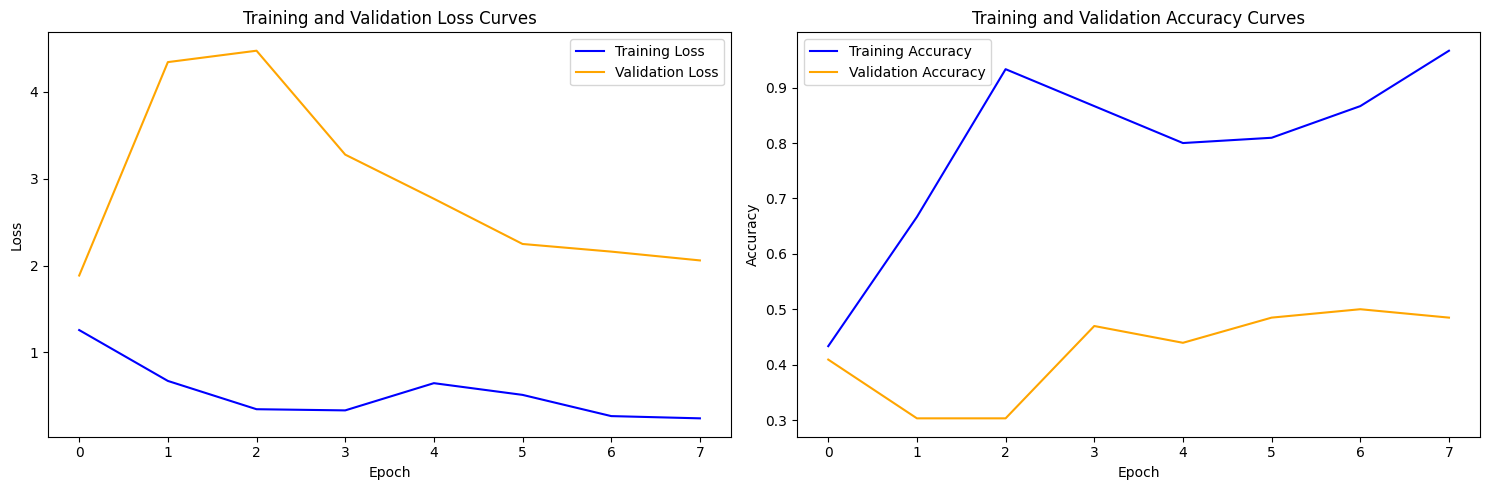

In [7]:
# Plot the training and validation loss curves
plt.figure(figsize=(15, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history["loss"])), history.history["loss"], label="Training Loss", color="blue")
plt.plot(range(len(history.history["val_loss"])), history.history["val_loss"], label="Validation Loss", color="orange")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(len(history.history["accuracy"])), history.history["accuracy"], label="Training Accuracy", color="blue")
plt.plot(range(len(history.history["val_accuracy"])), history.history["val_accuracy"], label="Validation Accuracy", color="orange")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()

# VGG16

In [10]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense

# Load the VGG16 model without the top (classification) layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Flatten the output of the VGG16 model
x = Flatten()(base_model.output)

# Add a dense layer for classification
x = Dense(128, activation='relu')(x)

# Add the output layer with softmax activation for 3 classes
outputs = Dense(3, activation='softmax')(x)

# Combine the base VGG16 model with the classification layers
model_vgg = Model(inputs=base_model.input, outputs=outputs)

# Print a summary of the model architecture
model_vgg.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [13]:
# Compile the model
model_vgg.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define number of epochs
epochs = 10

# Fit the model to the training data
history = model_vgg.fit(
    train_ds,
    steps_per_epoch = 5,
    epochs=epochs,
    validation_data=test_ds
)

2024-04-22 09:07:42.633777: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/10


In [ ]:
# Plot the training and validation loss curves
plt.figure(figsize=(15, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(len(history.history["loss"])), history.history["loss"], label="Training Loss", color="blue")
plt.plot(range(len(history.history["val_loss"])), history.history["val_loss"], label="Validation Loss", color="orange")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(len(history.history["accuracy"])), history.history["accuracy"], label="Training Accuracy", color="blue")
plt.plot(range(len(history.history["val_accuracy"])), history.history["val_accuracy"], label="Validation Accuracy", color="orange")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Curves')
plt.legend()

plt.tight_layout()
plt.show()